In [1]:
import pandas as pd
inputFile = "bank/bank.csv"
df = pd.read_csv(inputFile, sep=';')
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
df.shape

(4521, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_theme(style="whitegrid")

In [10]:
job_count = df['job'].value_counts()
job_count

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0.5, 1.0, 'Type of Job Distribution')

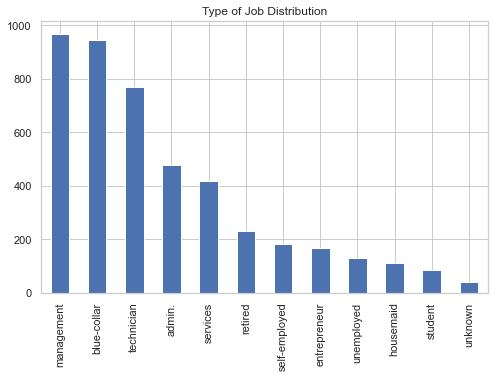

In [11]:
plt.figure(figsize = (8, 5))
job_count.plot(kind = "bar")
plt.title("Type of Job Distribution")

### Plot target column

In [14]:
target_count = df['y'].value_counts()
target_count

no     4000
yes     521
Name: y, dtype: int64

[Text(0.5, 1.0, 'Target Distribution')]

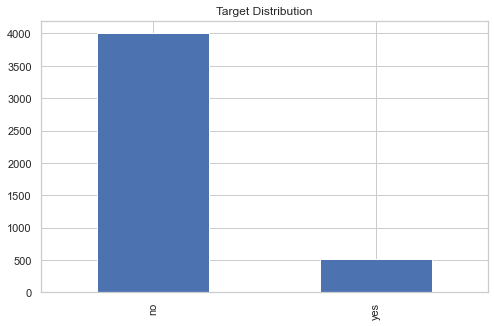

In [15]:
plt.figure(figsize = (8, 5))
target_count.plot(kind = "bar").set(title = "Target Distribution")

Text(0.5, 1.0, 'Client has subscribed a term deposite')

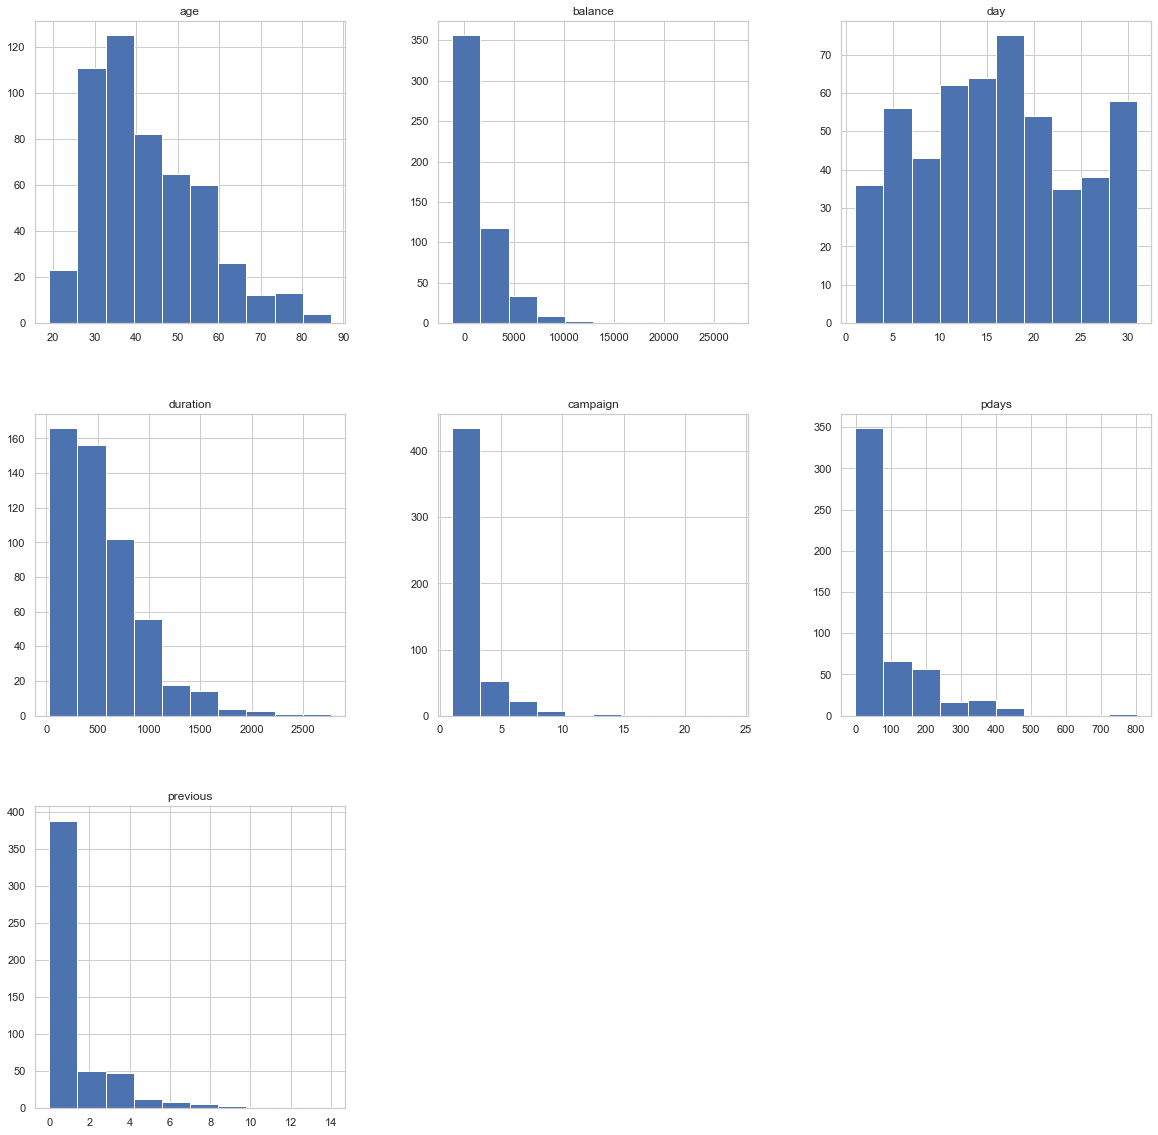

In [16]:
df[df['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposite')

### Data preprocessing

In [17]:
df.head(10)

age            job  marital  education default  balance housing loan  \
0   30     unemployed  married    primary      no     1787      no   no   
1   33       services  married  secondary      no     4789     yes  yes   
2   35     management   single   tertiary      no     1350     yes   no   
3   30     management  married   tertiary      no     1476     yes  yes   
4   59    blue-collar  married  secondary      no        0     yes   no   
5   35     management   single   tertiary      no      747      no   no   
6   36  self-employed  married   tertiary      no      307     yes   no   
7   39     technician  married  secondary      no      147     yes   no   
8   41   entrepreneur  married   tertiary      no      221     yes   no   
9   43       services  married    primary      no      -88     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
5  cellular   23   feb       141         2    176         3  failure  no  
6  cellular   14   may       341         1    330         2    other  no  
7  cellular    6   may       151         2     -1         0  unknown  no  
8   unknown   14   may        57         2     -1         0  unknown  no  
9  cellular   17   apr       313         1    147         2  failure  no

### Convert default column into numeric value

In [18]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)

In [20]:
df[['default','is_default']].tail(10)

default  is_default
4511      no           0
4512      no           0
4513      no           0
4514      no           0
4515      no           0
4516      no           0
4517     yes           1
4518      no           0
4519      no           0
4520      no           0

### Convert housing column into numeric value

In [21]:
df['is_housing'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)
df[['housing','is_housing']].tail(10)

housing  is_housing
4511     yes           1
4512     yes           1
4513      no           0
4514     yes           1
4515     yes           1
4516     yes           1
4517     yes           1
4518      no           0
4519      no           0
4520     yes           1

### Convert loan column into numeric value

In [22]:
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)
df[['loan', 'is_loan']].tail(10)

loan  is_loan
4511   no        0
4512   no        0
4513   no        0
4514   no        0
4515   no        0
4516   no        0
4517  yes        1
4518   no        0
4519   no        0
4520  yes        1

### Convert target column ‘y’ into numeric value

In [23]:
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)
df[['y', 'target']].tail(10)

y  target
4511  yes       1
4512   no       0
4513   no       0
4514   no       0
4515   no       0
4516   no       0
4517   no       0
4518   no       0
4519   no       0
4520   no       0

### Creating one-hot encoding for non-numeric marital column

In [24]:
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
marital_dummies.tail()

marital_divorced  marital_married  marital_single
4516                 0                1               0
4517                 0                1               0
4518                 0                1               0
4519                 0                1               0
4520                 0                0               1

### Remove marital_divorced column

In [25]:
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
marital_dummies.head()

marital_married  marital_single
0                1               0
1                1               0
2                0               1
3                1               0
4                1               0

### Merge marital_dummies into main dataframe

In [26]:
df = pd.concat([df, marital_dummies], axis=1)
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ... pdays  previous  poutcome   y  is_default is_housing  \
0  cellular   19  ...    -1         0   unknown  no           0          0   
1  cellular   11  ...   339         4   failure  no           0          1   
2  cellular   16  ...   330         1   failure  no           0          1   
3   unknown    3  ...    -1         0   unknown  no           0          1   
4   unknown    5  ...    -1         0   unknown  no           0          1   

  is_loan  target  marital_married  marital_single  
0       0       0                1               0  
1       1       0                1               0  
2       0       0                0               1  
3       1       0                1               0  
4       0       0                1               0  

[5 rows x 23 columns]

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'is_default', 'is_housing', 'is_loan',
       'target', 'marital_married', 'marital_single'],
      dtype='object')

### Creating one hot encoding for job column

In [28]:
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.tail()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
4516           0                0                 0              0   
4517           0                0                 0              0   
4518           0                0                 0              0   
4519           0                1                 0              0   
4520           0                0                 1              0   

      job_management  job_retired  job_self-employed  job_services  \
4516               0            0                  0             1   
4517               0            0                  1             0   
4518               0            0                  0             0   
4519               0            0                  0             0   
4520               0            0                  0             0   

      job_student  job_technician  job_unemployed  job_unknown  
4516            0               0               0            0  
4517            0               0               0            0  
4518            0               1               0            0  
4519            0               0               0            0  
4520            0               0               0            0

In [29]:
job_dummies.drop('job_unknown', axis=1, inplace=True)

In [30]:
df = pd.concat([df, job_dummies], axis=1)
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ... job_blue-collar  job_entrepreneur  job_housemaid  \
0  cellular   19  ...               0                 0              0   
1  cellular   11  ...               0                 0              0   
2  cellular   16  ...               0                 0              0   
3   unknown    3  ...               0                 0              0   
4   unknown    5  ...               1                 0              0   

   job_management  job_retired job_self-employed job_services  job_student  \
0               0            0                 0            0            0   
1               0            0                 0            1            0   
2               1            0                 0            0            0   
3               1            0                 0            0            0   
4               0            0                 0            0            0   

   job_technician  job_unemployed  
0               0               1  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 34 columns]

### Creating one hot encoding for education column

In [31]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.tail()

education_primary  education_secondary  education_tertiary  \
4516                  0                    1                   0   
4517                  0                    0                   1   
4518                  0                    1                   0   
4519                  0                    1                   0   
4520                  0                    0                   1   

      education_unknown  
4516                  0  
4517                  0  
4518                  0  
4519                  0  
4520                  0

In [32]:
education_dummies.drop('education_unknown', axis=1, inplace=True)
education_dummies.tail()

education_primary  education_secondary  education_tertiary
4516                  0                    1                   0
4517                  0                    0                   1
4518                  0                    1                   0
4519                  0                    1                   0
4520                  0                    0                   1

In [33]:
df = pd.concat([df, education_dummies], axis=1)
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ... job_management  job_retired  job_self-employed  \
0  cellular   19  ...              0            0                  0   
1  cellular   11  ...              0            0                  0   
2  cellular   16  ...              1            0                  0   
3   unknown    3  ...              1            0                  0   
4   unknown    5  ...              0            0                  0   

   job_services  job_student job_technician job_unemployed  education_primary  \
0             0            0              0              1                  1   
1             1            0              0              0                  0   
2             0            0              0              0                  0   
3             0            0              0              0                  0   
4             0            0              0              0                  0   

   education_secondary  education_tertiary  
0                    0                   0  
1                    1                   0  
2                    0                   1  
3                    0                   1  
4                    1                   0  

[5 rows x 37 columns]

### Creating one hot encoding for contact column

In [34]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.tail()

contact_cellular  contact_telephone  contact_unknown
4516                 1                  0                0
4517                 0                  0                1
4518                 1                  0                0
4519                 1                  0                0
4520                 1                  0                0

In [35]:
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
contact_dummies.tail()

contact_cellular  contact_telephone
4516                 1                  0
4517                 0                  0
4518                 1                  0
4519                 1                  0
4520                 1                  0

In [36]:
df = pd.concat([df, contact_dummies], axis=1)
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ... job_self-employed  job_services  job_student  \
0  cellular   19  ...                 0             0            0   
1  cellular   11  ...                 0             1            0   
2  cellular   16  ...                 0             0            0   
3   unknown    3  ...                 0             0            0   
4   unknown    5  ...                 0             0            0   

   job_technician  job_unemployed education_primary education_secondary  \
0               0               1                 1                   0   
1               0               0                 0                   1   
2               0               0                 0                   0   
3               0               0                 0                   0   
4               0               0                 0                   1   

   education_tertiary  contact_cellular  contact_telephone  
0                   0                 1                  0  
1                   0                 1                  0  
2                   1                 1                  0  
3                   1                 0                  0  
4                   0                 0                  0  

[5 rows x 39 columns]

### Creating one hot encoding for poutcome column

In [37]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.tail()

poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown
4516                 0               0                 0                 1
4517                 0               0                 0                 1
4518                 0               0                 0                 1
4519                 0               1                 0                 0
4520                 0               1                 0                 0

In [38]:
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
poutcome_dummies.tail()

poutcome_failure  poutcome_other  poutcome_success
4516                 0               0                 0
4517                 0               0                 0
4518                 0               0                 0
4519                 0               1                 0
4520                 0               1                 0

In [39]:
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day  ... job_technician  job_unemployed  education_primary  \
0  cellular   19  ...              0               1                  1   
1  cellular   11  ...              0               0                  0   
2  cellular   16  ...              0               0                  0   
3   unknown    3  ...              0               0                  0   
4   unknown    5  ...              0               0                  0   

   education_secondary  education_tertiary contact_cellular contact_telephone  \
0                    0                   0                1                 0   
1                    1                   0                1                 0   
2                    0                   1                1                 0   
3                    0                   1                0                 0   
4                    1                   0                0                 0   

   poutcome_failure  poutcome_other  poutcome_success  
0                 0               0                 0  
1                 1               0                 0  
2                 1               0                 0  
3                 0               0                 0  
4                 0               0                 0  

[5 rows x 42 columns]

### Convert month column into numeric value

In [40]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
df['month'].head()

0    10
1     5
2     4
3     6
4     5
Name: month, dtype: int64

### pdays column

In [41]:
df[df['pdays'] == -1]['pdays'].count()

3705

In [42]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['pdays','was_contacted']].head()

pdays  was_contacted
0     -1              0
1    339              1
2    330              1
3     -1              0
4     -1              0

### Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns

In [43]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)

### View After converting all columns into numeric column

In [44]:
df.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
was_contacted          int64
dtype: object

In [45]:
df.head(10)

age  balance  day  month  duration  campaign  previous  is_default  \
0   30     1787   19     10        79         1         0           0   
1   33     4789   11      5       220         1         4           0   
2   35     1350   16      4       185         1         1           0   
3   30     1476    3      6       199         4         0           0   
4   59        0    5      5       226         1         0           0   
5   35      747   23      2       141         2         3           0   
6   36      307   14      5       341         1         2           0   
7   39      147    6      5       151         2         0           0   
8   41      221   14      5        57         2         0           0   
9   43      -88   17      4       313         1         2           0   

   is_housing  is_loan  ...  job_unemployed  education_primary  \
0           0        0  ...               1                  1   
1           1        1  ...               0                  0   
2           1        0  ...               0                  0   
3           1        1  ...               0                  0   
4           1        0  ...               0                  0   
5           0        0  ...               0                  0   
6           1        0  ...               0                  0   
7           1        0  ...               0                  0   
8           1        0  ...               0                  0   
9           1        1  ...               0                  1   

   education_secondary  education_tertiary  contact_cellular  \
0                    0                   0                 1   
1                    1                   0                 1   
2                    0                   1                 1   
3                    0                   1                 0   
4                    1                   0                 0   
5                    0                   1                 1   
6                    0                   1                 1   
7                    1                   0                 1   
8                    0                   1                 0   
9                    0                   0                 1   

   contact_telephone  poutcome_failure  poutcome_other  poutcome_success  \
0                  0                 0               0                 0   
1                  0                 1               0                 0   
2                  0                 1               0                 0   
3                  0                 0               0                 0   
4                  0                 0               0                 0   
5                  0                 1               0                 0   
6                  0                 0               1                 0   
7                  0                 0               0                 0   
8                  0                 0               0                 0   
9                  0                 1               0                 0   

   was_contacted  
0              0  
1              1  
2              1  
3              0  
4              0  
5              1  
6              1  
7              0  
8              0  
9              1  

[10 rows x 33 columns]

### Convert into X(features) and y(target)

In [46]:
#The axis=1 argument drop columns
X = df.drop('target', axis=1)
y = df['target']

In [47]:
X.shape

(4521, 32)

In [48]:
y.shape

(4521,)

### Divide features and target into train and test data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

### View the shape of X_train, X_test, y_train, y_test

In [50]:
X_train.shape

(3616, 32)

In [51]:
y_train.shape

(3616,)

In [52]:
X_test.shape

(905, 32)

In [53]:
y_test.shape

(905,)

## Create a LogisticRegression model

In [63]:
from sklearn.linear_model import LogisticRegression

### Train the model

In [81]:
model = LogisticRegression(max_iter=10000)  # Increase max_iter value
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Predict test data

In [82]:
y_pred = model.predict(X_test)

In [83]:
print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


### View accuracy of the model

In [84]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 91.38%


### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfcpredictions = rfc.predict(X_test)
print("Predicted value: ", rfcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


In [86]:
accuracy = accuracy_score(y_pred = rfcpredictions, y_true = y_test)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 91.05%


### SVC (support Vector Classifier)

In [88]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svcpredictions = svc.predict(X_test)
print("Predicted value: ", svcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


In [89]:
accuracy = accuracy_score(y_pred = svcpredictions, y_true = y_test)
print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 89.61%


### Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)
print("Predicted value: ", dtcprediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 1]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


In [91]:
accuracy = accuracy_score(y_pred = dtcprediction, y_true = y_test)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 87.29%
